# MSCS 634 – Lab 1  
Vamsi Krishna Gajulapalli  
MSCS 634 Advanced Big Data and Data Mining   
Data Visualization, Preprocessing & Statistical Analysis


In [3]:
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Data Visualization

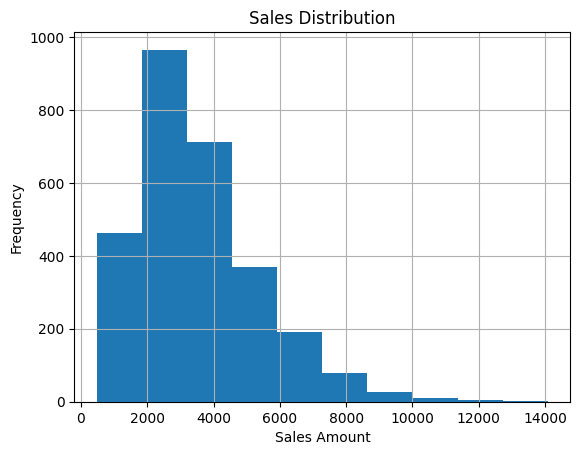

In [6]:
import matplotlib.pyplot as plt

df['SALES'].hist()
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


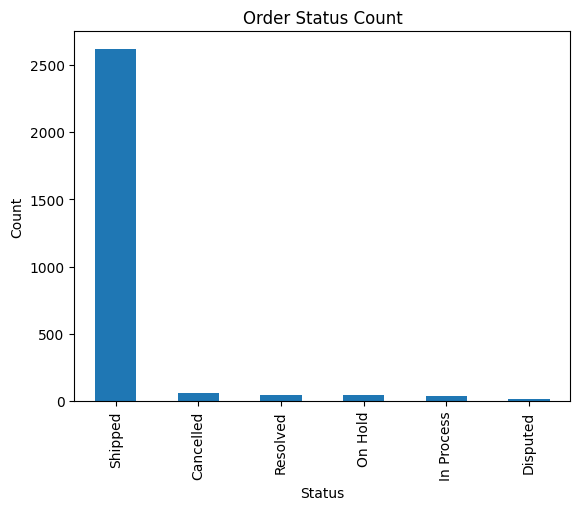

In [7]:
df['STATUS'].value_counts().plot(kind='bar')
plt.title("Order Status Count")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


### Visualization Insights

The histogram shows that most sales values are concentrated at lower amounts, indicating that smaller purchases are more frequent. The bar chart shows that shipped orders dominate the dataset, suggesting efficient order fulfillment.


# Data Preprocessing

## Missing Values — BEFORE & AFTER

In [8]:
# BEFORE: missing values summary
before_missing = df.isnull().sum().sort_values(ascending=False)

# Fix missing values
df_missing_fixed = df.copy()

num_cols = df_missing_fixed.select_dtypes(include='number').columns
df_missing_fixed[num_cols] = df_missing_fixed[num_cols].fillna(df_missing_fixed[num_cols].mean())

cat_cols = df_missing_fixed.select_dtypes(exclude='number').columns
for col in cat_cols:
    if df_missing_fixed[col].isnull().any():
        df_missing_fixed[col] = df_missing_fixed[col].fillna(df_missing_fixed[col].mode()[0])

# AFTER: missing values summary
after_missing = df_missing_fixed.isnull().sum().sort_values(ascending=False)

print("Missing values BEFORE:\n", before_missing.head(15))
print("\nMissing values AFTER:\n", after_missing.head(15))

print("\nData preview BEFORE (df):")
display(df.head())

print("\nData preview AFTER (df_missing_fixed):")
display(df_missing_fixed.head())


Missing values BEFORE:
 ADDRESSLINE2       2521
STATE              1486
TERRITORY          1074
POSTALCODE           76
SALES                 0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
ORDERNUMBER           0
MONTH_ID              0
QTR_ID                0
STATUS                0
ORDERDATE             0
PRODUCTCODE           0
YEAR_ID               0
dtype: int64

Missing values AFTER:
 ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
PHONE              0
dtype: int64

Data preview BEFORE (df):


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium



Data preview AFTER (df_missing_fixed):


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,Level 3,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,Level 3,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Level 3,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,Level 3,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,Level 3,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


## Outliers (IQR)

In [10]:
col = "SALES"

Q1 = df_missing_fixed[col].quantile(0.25)
Q3 = df_missing_fixed[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_missing_fixed[(df_missing_fixed[col] < lower) | (df_missing_fixed[col] > upper)]
df_no_outliers = df_missing_fixed[(df_missing_fixed[col] >= lower) & (df_missing_fixed[col] <= upper)]

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
print("\nNumber of outliers found:", outliers.shape[0])

display(outliers.head())
print("\nShape BEFORE outlier handling:", df_missing_fixed.shape)
print("Shape AFTER outlier handling:", df_no_outliers.shape)


Q1: 2203.43, Q3: 4508.00, IQR: 2304.57
Lower bound: -1253.42, Upper bound: 7964.85

Number of outliers found: 81


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
30,10150,45,100.0,8,10993.50,9/19/2003 0:00,Shipped,3,9,2003,...,"Bronz Sok., Bronz Apt. 3/6 Tesvikiye",Level 3,Singapore,CA,79903,Singapore,Japan,Natividad,Eric,Large
32,10174,34,100.0,4,8014.82,11/6/2003 0:00,Shipped,4,11,2003,...,31 Duncan St. West End,Level 3,South Brisbane,Queensland,4101,Australia,APAC,Calaghan,Tony,Large
35,10206,47,100.0,6,9064.89,12/5/2003 0:00,Shipped,4,12,2003,...,1900 Oak St.,Level 3,Vancouver,BC,V3F 2K1,Canada,EMEA,Tannamuri,Yoshi,Large
41,10280,34,100.0,2,8014.82,8/17/2004 0:00,Shipped,3,8,2004,...,Via Monte Bianco 34,Level 3,Torino,CA,10100,Italy,EMEA,Accorti,Paolo,Large
43,10304,47,100.0,6,10172.70,10/11/2004 0:00,Shipped,4,10,2004,...,"67, avenue de l'Europe",Level 3,Versailles,CA,78000,France,EMEA,Tonini,Daniel,Large



Shape BEFORE outlier handling: (2823, 25)
Shape AFTER outlier handling: (2742, 25)


## Data Reduction

In [11]:
print("Shape BEFORE reduction:", df_no_outliers.shape)

df_reduced = df_no_outliers.sample(frac=0.5, random_state=42)

# Drop some less relevant columns (only if they exist)
drop_cols = [c for c in ['ADDRESSLINE1','ADDRESSLINE2','PHONE'] if c in df_reduced.columns]
df_reduced = df_reduced.drop(columns=drop_cols)

print("Columns dropped:", drop_cols)
print("Shape AFTER reduction:", df_reduced.shape)

display(df_no_outliers.head())
display(df_reduced.head())


Shape BEFORE reduction: (2742, 25)
Columns dropped: ['ADDRESSLINE1', 'ADDRESSLINE2', 'PHONE']
Shape AFTER reduction: (1371, 22)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,Level 3,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,Level 3,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Level 3,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,Level 3,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,Level 3,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
915,10183,39,68.08,11,2655.12,11/13/2003 0:00,Shipped,4,11,2003,...,S18_2957,"Classic Gift Ideas, Inc",Philadelphia,PA,71270,USA,EMEA,Cervantes,Francisca,Small
1592,10129,45,100.00,9,6027.75,6/12/2003 0:00,Shipped,2,6,2003,...,S24_2011,"Stylish Desk Decors, Co.",London,CA,WX3 6FW,UK,EMEA,Brown,Ann,Medium
1391,10378,49,67.14,8,3289.86,2/10/2005 0:00,Shipped,1,2,2005,...,S18_4721,Euro Shopping Channel,Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Medium
1421,10192,37,69.82,4,2583.34,11/20/2003 0:00,Shipped,4,11,2003,...,S24_1046,Online Diecast Creations Co.,Nashua,NH,62005,USA,EMEA,Young,Valarie,Small
2106,10250,37,74.62,5,2760.94,5/11/2004 0:00,Shipped,2,5,2004,...,S24_4278,The Sharp Gifts Warehouse,San Jose,CA,94217,USA,EMEA,Frick,Sue,Small


## Scaling + Discretization

In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scale_cols = ['SALES', 'PRICEEACH', 'QUANTITYORDERED']

print("BEFORE scaling:")
display(df_reduced[scale_cols].head())

scaler = MinMaxScaler()
df_scaled = df_reduced.copy()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])

# Discretize SALES into 3 categories
df_scaled['SALES_CATEGORY'] = pd.cut(df_scaled['SALES'], bins=3, labels=['Low','Medium','High'])

print("AFTER scaling + discretization:")
display(df_scaled[scale_cols + ['SALES_CATEGORY']].head())


BEFORE scaling:


,SALES,PRICEEACH,QUANTITYORDERED
915,2655.12,68.08,39
1592,6027.75,100.00,45
1391,3289.86,67.14,49
1421,2583.34,69.82,37
2106,2760.94,74.62,37


AFTER scaling + discretization:


,SALES,PRICEEACH,QUANTITYORDERED,SALES_CATEGORY
915,0.290502,0.561418,0.464789,Low
1592,0.741382,1.000000,0.549296,High
1391,0.375359,0.548502,0.605634,Medium
1421,0.280906,0.585326,0.436620,Low
2106,0.304649,0.651278,0.436620,Low


# Statistical Analysis

## General Overview

In [16]:
final_df = df_scaled.copy()
final_df.head()
final_df.info()
final_df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 915 to 740
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ORDERNUMBER       1371 non-null   int64   
 1   QUANTITYORDERED   1371 non-null   float64 
 2   PRICEEACH         1371 non-null   float64 
 3   ORDERLINENUMBER   1371 non-null   int64   
 4   SALES             1371 non-null   float64 
 5   ORDERDATE         1371 non-null   object  
 6   STATUS            1371 non-null   object  
 7   QTR_ID            1371 non-null   int64   
 8   MONTH_ID          1371 non-null   int64   
 9   YEAR_ID           1371 non-null   int64   
 10  PRODUCTLINE       1371 non-null   object  
 11  MSRP              1371 non-null   int64   
 12  PRODUCTCODE       1371 non-null   object  
 13  CUSTOMERNAME      1371 non-null   object  
 14  CITY              1371 non-null   object  
 15  STATE             1371 non-null   object  
 16  POSTALCODE        1371 non-n

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,10258.463166,0.405420,0.778352,6.452225,0.393767,2.765135,7.233406,2003.804522,99.271335
std,91.014697,0.132622,0.273070,4.249313,0.208689,1.196215,3.630096,0.692827,38.621172
min,10100.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2003.000000,33.000000
25%,10180.000000,0.295775,0.584501,3.000000,0.231962,2.000000,4.000000,2003.000000,68.000000
50%,10262.000000,0.408451,0.934597,6.000000,0.359329,3.000000,8.000000,2004.000000,97.000000
75%,10331.500000,0.507042,1.000000,9.000000,0.525506,4.000000,11.000000,2004.000000,122.000000
max,10425.000000,1.000000,1.000000,18.000000,1.000000,4.000000,12.000000,2005.000000,214.000000


## Central Tendency

In [17]:
col = "SALES"

print("Minimum:", final_df[col].min())
print("Maximum:", final_df[col].max())
print("Mean:", final_df[col].mean())
print("Median:", final_df[col].median())
print("Mode:", final_df[col].mode()[0])


Minimum: 0.0
Maximum: 1.0
Mean: 0.3937666986551227
Median: 0.3593289403498077
Mode: 0.13067588578242834


## Dispersion Measures

In [18]:
Q1 = final_df[col].quantile(0.25)
Q3 = final_df[col].quantile(0.75)
IQR = Q3 - Q1

print("Range:", final_df[col].max() - final_df[col].min())
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Variance:", final_df[col].var())
print("Standard Deviation:", final_df[col].std())


Range: 1.0
Q1: 0.231962497877705
Q3: 0.5255056409598255
IQR: 0.29354314308212054
Variance: 0.04355117516799195
Standard Deviation: 0.2086891831600094


## Correlation Matrix

In [19]:
final_df.select_dtypes(include='number').corr()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.034657,0.024482,-0.034880,0.032078,-0.054197,-0.043766,0.903048,0.009123
QUANTITYORDERED,0.034657,1.000000,-0.040546,0.007213,0.516431,-0.044927,-0.035473,0.037855,-0.060805
PRICEEACH,0.024482,-0.040546,1.000000,-0.028870,0.693718,-0.014674,-0.015436,0.028474,0.674972
ORDERLINENUMBER,-0.034880,0.007213,-0.028870,1.000000,-0.046184,0.023782,0.018752,-0.031439,-0.031637
SALES,0.032078,0.516431,0.693718,-0.046184,1.000000,0.000395,0.005028,0.023055,0.617065
QTR_ID,-0.054197,-0.044927,-0.014674,0.023782,0.000395,1.000000,0.979006,-0.438557,0.019439
MONTH_ID,-0.043766,-0.035473,-0.015436,0.018752,0.005028,0.979006,1.000000,-0.437501,0.022742
YEAR_ID,0.903048,0.037855,0.028474,-0.031439,0.023055,-0.438557,-0.437501,1.000000,-0.000280
MSRP,0.009123,-0.060805,0.674972,-0.031637,0.617065,0.019439,0.022742,-0.000280,1.000000
